In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [307]:
R = RootSystem(["E",7])
#A = R.ambient_space()
L = R.root_lattice()
roots = L.roots()
simple_roots = L.simple_roots()
#roots_realspace = A.roots()
#simple_roots_realspace = A.simple_roots()
weyl_group = L.weyl_group()
coxeter_element = weyl_group.coxeter_element().matrix()
coxeter_number = weyl_group.coxeter_number()

ev = coxeter_element.eigenvectors_left()
cox_plane = max(ev,key=lambda x : x[0].real() - (x[0].imag() < 0))[1][0] #wacky hack, if I do say so myself
root_coordinates = [vector(r.dense_coefficient_list()) for r in roots]

M = R.cartan_matrix()
D = M.dense_matrix()

0
10
20
30
40
50
60
70
80
90
100
110
120
0
10
20
30
40
50
60
70
80
90
100
110
120


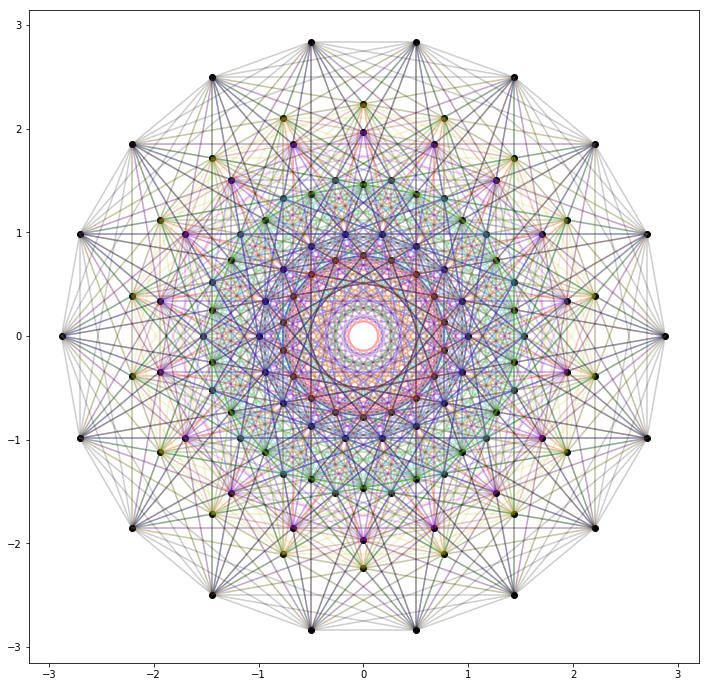

In [311]:
plt.figure(figsize=(12,12))

radii = []
colours = ['b','g','r','c','m','y','k']

for coords_i in range(len(roots)):
    
    if coords_i %10 == 0:
        print(coords_i)
    coords = root_coordinates[coords_i]
    inner_prod = coords.inner_product(cox_plane)
    plt.scatter([inner_prod.real()],[inner_prod.imag()],color='black')
    
    if inner_prod.norm() not in radii:
        radii.append(inner_prod.norm())

for coords_i in range(len(roots)):
    if coords_i % 10 == 0:
        print(coords_i)
    coords = root_coordinates[coords_i]
    inner_prod = coords.inner_product(cox_plane)
    
    f = lambda s : (s-coords)*D*(s-coords)
    #min_dist = min([f(s) for s in root_coordinates[:coords_i]+root_coordinates[coords_i+1:]])
    #print(min_dist)
    min_dist = 2
    close = [s.inner_product(cox_plane) for s in root_coordinates if f(s) == min_dist]
    
    [plt.plot([inner_prod.real(),s.real()],[inner_prod.imag(),s.imag()],color=colours[radii.index(inner_prod.norm())],
              alpha=0.1) for s in close]
    
plt.show()

In [185]:
one = root_coordinates[100]
md = min([(s-one).norm() for s in root_coordinates[:100] + root_coordinates[101:]])
[s for s in root_coordinates if (s-one).norm() == md]

[(1, 2, 2, 4, 3, 2, 2, 1),
 (1, 2, 3, 4, 3, 2, 1, 1),
 (1, 2, 3, 4, 3, 3, 2, 1),
 (2, 2, 3, 4, 3, 2, 2, 1)]

In [186]:
alpha = [min([(s-root_coordinates[z_i]).norm() for s in root_coordinates[:z_i] + root_coordinates[z_i+1:]]) for z_i in range(len(root_coordinates))]

In [ ]:
alpha

In [ ]:


#step 1: Find out all the projections, and norm classes of projections
projections = []
d_to_vecs = {} #norms to vectors with that norm
for r in root_coordinates:
    tp = r.inner_product(cox_plane)
    projections.append(tp)
    n = tp.norm()
    if n not in d_to_vecs:
        d_to_vecs[n] = [r]
    else:
        d_to_vecs[n].append(r)
    

#step 2: Find out all the adjacencies

    
    
#step final : Draw everything
plt.figure(figsize=(12,12))
plt.scatter([[x.real(),x.imag()] for x in projections],color='black')

    
    
    min_dist = min(root_coordinates, key = lambda s : (s-coords).norm()).inner_product(coords) #bad code
    close = [s.inner_product(cox_plane) for s in root_coordinates if (s-coords).norm() <= 1.01*min_dist] #bad code
    [plt.plot([inner_prod.real(),s.real()],[inner_prod.imag(),s.imag()],color='black',alpha=0.1) for s in close]
    
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239


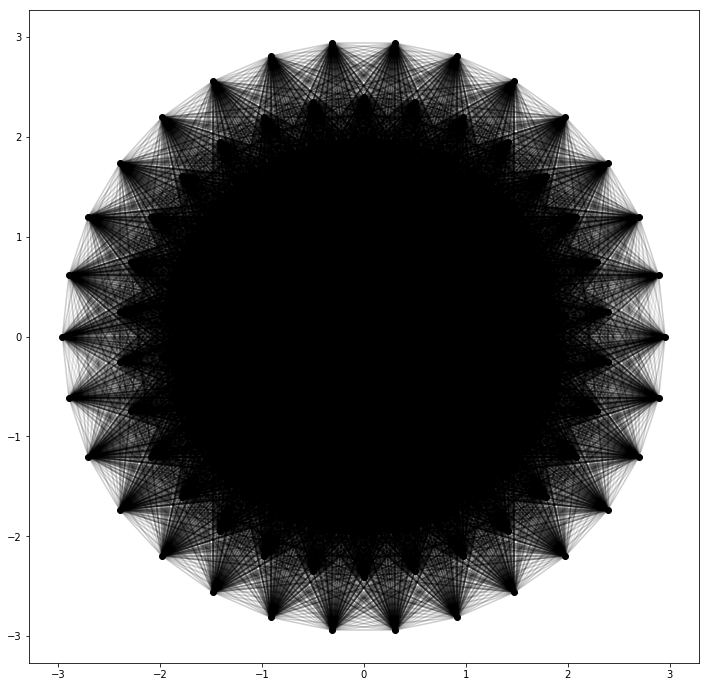

In [170]:
plt.figure(figsize=(12,12))

roots_to_proj = {}

for coords_i in range(len(root_coordinates)):
    print(coords_i)
    coords = root_coordinates[coords_i]
    inner_prod = coords.inner_product(cox_plane)
    plt.scatter([inner_prod.real()],[inner_prod.imag()],color='black')
    
    min_dist = min(root_coordinates, key = lambda s : (s-coords).norm()).inner_product(coords) #bad code
    close = [s.inner_product(cox_plane) for s in root_coordinates if (s-coords).norm() <= 1.01*min_dist] #bad code
    [plt.plot([inner_prod.real(),s.real()],[inner_prod.imag(),s.imag()],color='black',alpha=0.1) for s in close]
    
plt.show()

In [144]:
ax = roots[0]

In [146]:
ax.dense_coefficient_list()

[1, 0, 0, 0, 0, 0, 0, 0]

In [147]:
i*i

-1

In [142]:
cox_plane.inner_product(vector((0,0,1,1,1,1,1,1)))

10.39073800366903? - 3.286769273562348?*I

In [128]:
[arctan(float(x[0].imag()/x[0].real())) for x in ev]

[0.4188790204786391,
 -0.4188790204786391,
 0.8377580409572781,
 -0.8377580409572781,
 -1.4660765716752369,
 1.4660765716752369,
 -0.20943951023931956,
 0.20943951023931956]

In [118]:
np.arctan()

ValueError: invalid number of arguments

In [122]:
g = eg.imag()/eg.real()

In [126]:
np.arctan(float(eg.imag()/eg.real()))

-0.8377580409572781

In [ ]:
#Old stuff below

In [67]:
a = CartanMatrix(['E',8])
b = a.root_system()
c = b.root_lattice()
d = c.roots()
W = c.weyl_group()

In [74]:
m = cc.matrix()

In [76]:
e = m.eigenvalues()

In [79]:
n = e[0]

In [81]:
n.ima

-0.9135454576426009?

In [85]:
len(e)

8

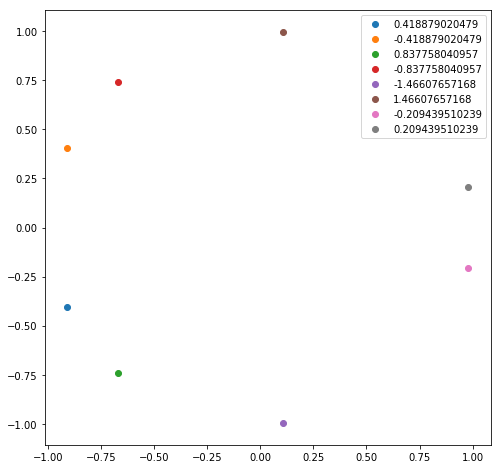

In [130]:
plt.figure(figsize=(8,8))
[plt.scatter([ee.real()],[ee.imag()],label=arctan(float(ee.imag()/ee.real()))) for ee in e]
plt.legend()
plt.show()

In [70]:
cc = W.coxeter_element()

In [44]:
e.dense_coefficient_list()

[1, 2, 3, 4, 3, 2, 2, 1]

In [61]:
e = d[100]

In [62]:
e

alpha[1] + 2*alpha[2] + 3*alpha[3] + 4*alpha[4] + 3*alpha[5] + 2*alpha[6] + 2*alpha[7] + alpha[8]

In [41]:
e.coefficients()

[1]

In [51]:
2*vector([0,1])

(0, 2)

In [65]:
def see_E8_questionably(simple,roots):
    """
    given list of simple roots, and list of all roots, lets see if we can see anything
    """
    plt.figure(figsize=(8,8))
    dim = len(simple)
    simple_coords = [vector([np.cos(np.pi*x/dim),np.sin(np.pi*x/dim)]) for x in range(dim)]
    for r in roots:
        pos = sum([simple_coords[a]*r.dense_coefficient_list()[a] for a in range(len(simple_coords))])
        plt.scatter([pos[0]],[pos[1]],color='black')
    plt.show()
    

In [63]:
len(c.roots())

240

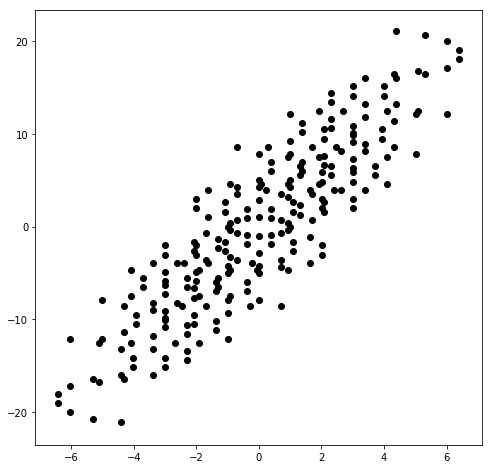

In [66]:
see_E8_questionably(c.simple_roots(),c.roots())

In [64]:
c.roots()

[alpha[1],
 alpha[2],
 alpha[3],
 alpha[4],
 alpha[5],
 alpha[6],
 alpha[7],
 alpha[8],
 alpha[3] + alpha[4],
 alpha[2] + alpha[4],
 alpha[6] + alpha[7],
 alpha[5] + alpha[6],
 alpha[1] + alpha[3],
 alpha[7] + alpha[8],
 alpha[4] + alpha[5],
 alpha[6] + alpha[7] + alpha[8],
 alpha[4] + alpha[5] + alpha[6],
 alpha[2] + alpha[3] + alpha[4],
 alpha[3] + alpha[4] + alpha[5],
 alpha[5] + alpha[6] + alpha[7],
 alpha[2] + alpha[4] + alpha[5],
 alpha[1] + alpha[3] + alpha[4],
 alpha[1] + alpha[3] + alpha[4] + alpha[5],
 alpha[5] + alpha[6] + alpha[7] + alpha[8],
 alpha[2] + alpha[3] + alpha[4] + alpha[5],
 alpha[4] + alpha[5] + alpha[6] + alpha[7],
 alpha[1] + alpha[2] + alpha[3] + alpha[4],
 alpha[2] + alpha[4] + alpha[5] + alpha[6],
 alpha[3] + alpha[4] + alpha[5] + alpha[6],
 alpha[1] + alpha[2] + alpha[3] + alpha[4] + alpha[5],
 alpha[3] + alpha[4] + alpha[5] + alpha[6] + alpha[7],
 alpha[4] + alpha[5] + alpha[6] + alpha[7] + alpha[8],
 alpha[2] + alpha[4] + alpha[5] + alpha[6] + alpha[7],